<class 'str'>
BILL TO:

Holin Die. Invoice # 00001

Alpha Bravo Road 33 Invoice Date 12/12/2001

P: 111-222-333, F: 111-222-334

client@example.net Nemect Ren! Bop
Contact Phone 101-102-103

Sapene an Payment Terms Cash on Delivery

Office Road 38

P: 111-333-222, F: 122-222-334 Amount Due: $4,170

office@example.net



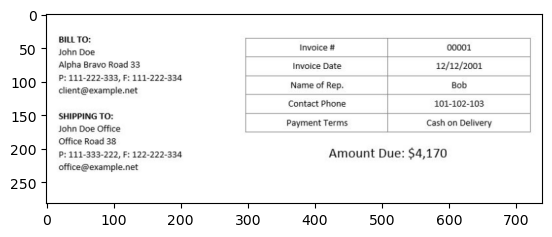

In [1]:

import pytesseract
import cv2
pytesseract.pytesseract.tesseract_cmd = "/opt/homebrew/bin/tesseract" #since tesseract isn't in this environment's PATH
from PIL import Image
import matplotlib.pyplot as plt
image= Image.open("/Users/rajataggarwal/Desktop/test2.png")
img= cv2.imread("/Users/rajataggarwal/Desktop/test2.png")
#img=cv2.imread("/Users/rajataggarwal/Desktop/ghee.jpeg",0)
type(img)
plt.imshow(img)
extracted_text= pytesseract.image_to_string(img)
print(type(extracted_text))
print(extracted_text)



In [7]:
#Getting boxes around Text
from pytesseract import Output
d= pytesseract.image_to_data(img, output_type=Output.DICT)
d.keys()




dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [ ]:
n_boxes=len(d['text']) #text list(from d.keys()) contains words in the image. this function hence gives the length of text list i.e counts total number of words/items.
for i in range(n_boxes):
    if int(d['conf'][i]>50): # conf list(from d.keys()) tells us how confident tesseract model is about accuracy of the word being that what OCR predicted. It ranges over 0 to 100. and -1 means no word detected in that area.
        (l,t,w,h)= (d['left'][i],d['top'][i], d['width'][i], d['height'][i]) # this left, top, wight and height are the coordinates and dimensions of the word extracted from d.keys(). here if we have confident score of more than 50, then we are asigning this coordinates and dimensions to the bounding box, for the word.
        img= cv2.rectangle(img, (l,t), (l+w, t+h), (0,255,0), 2) # this function draws a rectangle around the word with the coordinates and dimensions we got above. here (0,255,0) is the color of the bounding box and 2 is the thickness of the bounding box.
cv2.imshow('img', img) # this function shows the image with the bounding box around the words.
cv2.waitKey(0) 
#cv2.imshow('img', img) to display an image, it opens a window showing the image. However, the window will immediately close if the program finishes execution without waiting for user input.
#cv2.waitKey(0) tells OpenCV to wait indefinitely until a key is pressed.
cv2.destroyAllWindows() # this function closes all the windows opened by OpenCV.

In [ ]:
#text template(date) matching to tell the expiry date of products
import re
from pytesseract import Output

d2 = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d2.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d2['text'])
for i in range(n_boxes):
    if int(d2['conf'][i]) > 60:
    	if re.match(date_pattern, d2['text'][i]):
	        (x, y, w, h) = (d2['left'][i], d2['top'][i], d2['width'][i], d2['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows() # this function closes all the windows opened by OpenCV.